In [ ]:
colab = True

In [1]:
if colab:
    from google.colab import drive
    drive.mount('gdrive')
    gdrive_dir = 'gdrive/My Drive/Colab'
    !rm -rf modis_utils
    !git clone https://github.com/lamductan/modis_utils.git
    !pip install rasterio

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import shutil
import datetime
import tensorflow as tf
from shutil import unpack_archive, make_archive

In [0]:
from modis_utils.misc import restore_data
from modis_utils.modis_utils import ModisUtils
from modis_utils.model.loss_function import PSNRLoss, lossSSIM, SSIM, step_decay
from modis_utils.model.loss_function import mse_with_mask_tf, mse_with_mask_tf_1, mse_with_mask

# Parameters

In [0]:
config_path = 'config.dat'
config_params = restore_data(os.path.join(gdrive_dir, config_path))

In [0]:
lr = config_params['lr']

In [ ]:
training = False
crop_size = config_params['crop_size']
input_timesteps = config_params['input_timesteps']
output_timesteps = config_params['output_timesteps']
batch_size = config_params['batch_size']
compile_params = config_params['compile_params']
model_name = config_params['model_name']
preprocessed_type = config_params['preprocessed_type']
modis_product = config_params['modis_product']
monitor = config_params['monitor']
monitor_mode = config_params['monitor_mode']
resize_input = config_params['resize_input']

raw_data_dir = config_params['raw_data_dir']
reservoir_index = config_params['reservoir_index']
used_band = config_params['used_band']
year_range = config_params['year_range']
model_keras = config_params['model_keras']
original_batch_size = config_params['original_batch_size']

TPU_FLAG = False

# End Parameters

In [0]:
if colab:
    if not os.path.exists('data_augment_merged'):
        unpack_archive(os.path.join(gdrive_dir, 'data_augment_merged.zip'), '.')
    if not os.path.exists('data_file'):
        unpack_archive(os.path.join(gdrive_dir, 'data_file.zip'), '.')
    if not os.path.exists('preprocessed_data'):
        unpack_archive(os.path.join(gdrive_dir, 'preprocessed_data.zip'), '.')
    if not os.path.exists('masked_data'):
        unpack_archive(os.path.join(gdrive_dir, 'masked_data.zip'), '.')

In [0]:
modis_utils = ModisUtils(
    raw_data_dir=raw_data_dir,
    modis_product=modis_product,
    reservoir_index=reservoir_index,
    preprocessed_type=preprocessed_type,
    used_band=used_band,
    crop_size=crop_size,
    input_timesteps=input_timesteps,
    output_timesteps=output_timesteps,
    year_range=year_range,
    model_name=model_name,
    batch_size=batch_size,
    model_keras=model_keras,
    compile_params=compile_params,
    original_batch_size=original_batch_size,
    TPU_FLAG=TPU_FLAG,
    training=training,
    monitor=monitor,
    monitor_mode=monitor_mode,
    resize_input=resize_input)

In [12]:
if colab:
    shutil.copy(os.path.join(gdrive_dir, modis_utils.model_path), '.')

'./convlstm_simple.h5'

In [13]:
inference_model = modis_utils.get_inference_model(513, 513)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


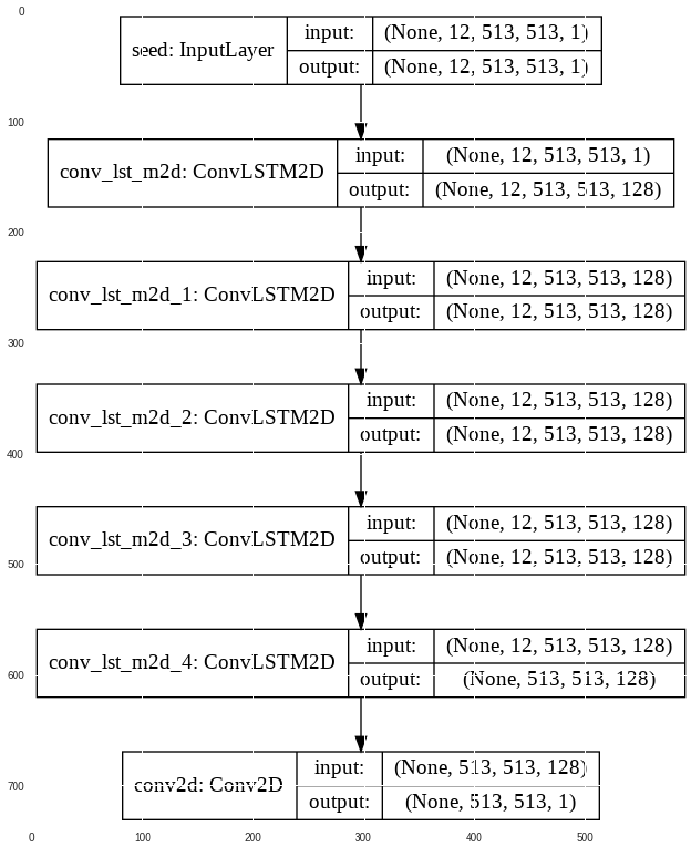

In [14]:
modis_utils.plot_inference_model()

In [0]:
a = modis_utils.get_inference('test')

In [ ]:
assert a is not None

In [0]:
modis_utils.inference_all(['test'])

In [0]:
predict_file = modis_utils.make_archive_predict()

In [0]:
if colab:
    shutil.move(predict_file + '.zip', gdrive_dir)